# Project description

You work in the Strimchik online store, which sells computer games all over the world. Historical game sales data, user and expert ratings, genres and platforms (such as Xbox or PlayStation) are available from public sources. You need to identify the patterns that determine the success of the game. This will allow you to bid on a potentially popular product and plan advertising campaigns. Here is the data up to 2016. Let's say it's December 2016 and you're planning a campaign for 2017. It is necessary to work out the principle of working with data. It doesn't matter if you're forecasting 2017 sales from 2016 data or 2027 sales from 2026 data. The abbreviation ESRB (Entertainment Software Rating Board) is an association that determines the age rating of computer games in the data set. The ESRB evaluates game content and assigns it to an appropriate age rating, such as Mature, Toddler, or Teen.

# Data Description

1. Name — name of the game
2. Platform — gamepad
3. Year_of_Release
4. Genre
5. NA_sales — sales in North America
6. EU_sales — sales in Europe
7. JP_sales — sales in Japan
8. Other_sales — sales in other countries
9. Critic_Score - max 100
10. User_Score — max 10
11. Rating — Entertainment Software Rating Board

# [Opening a data file and examining general information](#begin)

# [Data preparation](#preparation)

# [Exploratory data analysis](#analis)

# [Drawing up a portrait of the user of each region](#portret)

# [Hypothesis testing](#gipoteza)

- The average user ratings of the Xbox One and PC platforms are the same;
- Average user ratings for Action and Sports genres are different.

# [General conclusion](#end)

# Opening a data file and examining general information
<a id='begin'></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from scipy import stats as st

In [2]:
games = pd.read_csv('/datasets/games.csv')

In [3]:
games.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
3001,Contra: Legacy of War,PS,1996.0,Shooter,0.37,0.25,0.00,0.04,NaN,NaN,NaN
16491,Ride,X360,2015.0,Racing,0.00,0.01,0.00,0.00,NaN,NaN,NaN
125,Red Dead Redemption,PS3,2010.0,Action,2.79,2.53,0.17,0.99,95.0,8.8,M
1831,Persona 4: Golden,PSV,2012.0,Role-Playing,0.36,0.23,0.38,0.15,93.0,9.2,M
8280,uDraw Studio: Instant Artist,Wii,2011.0,Misc,0.06,0.09,0.00,0.02,NaN,tbd,E
16556,Shijyou Saikyou no Deshi Kenichi: Gekitou! Rag...,PS2,2007.0,Fighting,0.00,0.00,0.01,0.00,NaN,NaN,NaN
15808,East India Company,PC,2009.0,Strategy,0.01,0.00,0.00,0.00,67.0,5.7,T
1353,NFL Street,PS2,2004.0,Sports,1.15,0.08,0.00,0.19,80.0,8.9,E
11141,The Weakest Link,PS,2001.0,Misc,0.05,0.03,0.00,0.01,63.0,7.2,E
12093,Fairy Tail: Zelef Kakusei,PSP,2012.0,Action,0.00,0.00,0.07,0.00,NaN,NaN,NaN


In [4]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [5]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<div class="alert alert-info">
    At first glance, there is a large number of gaps in different columns (as well as, in principle, zero values). The reasons for the gaps in the columns with ratings can be the absence of any ratings (an unpopular game, or a release on a specific platform), a recently released game (there are simply no comments and ratings for it yet), a banal inattention of the data entry, a system failure, etc.

# Data preparation 
<a id='preparation'></a>

Convert all column names to lowercase

In [6]:
games.columns = games.columns.str.lower()

In [7]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [8]:
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Delete rows with zero values in the columns: name, year_of_release, genre there are few of them and they will not affect the overall result

In [9]:
games.dropna(subset = ['name', 'genre', 'year_of_release'], inplace=True)

In [10]:
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

Let's bring the column indicating the year of release to the uint16 type, because it stores specific numbers in a small interval

In [11]:
games['year_of_release'] = games['year_of_release'].astype('uint16')

In [12]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null uint16
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         9839 non-null object
rating             9768 non-null object
dtypes: float64(5), object(5), uint16(1)
memory usage: 1.4+ MB


In [13]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Considering that tbd are games that have not yet received a rating, we will replace them with nan values. After that we can change the data type to float

In [14]:
games.loc[(games['user_score'] == 'tbd'), 'user_score'] = np.nan

In [15]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [16]:
games['user_score'] = games['user_score'].astype('float')

In [17]:
games.duplicated().sum()

0

Calculate and add a column with the total number of sales for each game

In [18]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [19]:
games.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,7983.000000,7463.000000,16444.000000
mean,2006.486256,0.264012,0.145930,0.078487,0.047594,68.994363,7.126330,0.536023
std,5.875525,0.818378,0.506716,0.311100,0.188005,13.920060,1.499447,1.558786
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000,0.470000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,82.540000


In [20]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null uint16
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             9768 non-null object
total_sales        16444 non-null float64
dtypes: float64(7), object(4), uint16(1)
memory usage: 1.5+ MB


We will not delete or replace the gaps in the remaining columns with any values, because there are many of them and any actions can distort the data for analysis. It is not possible to fill in the truthful data

# Exploratory data analysis
<a id='analis'></a>

Let's see how many games were released in different years

Text(0.5, 1.0, 'Распределение по годам релиза')

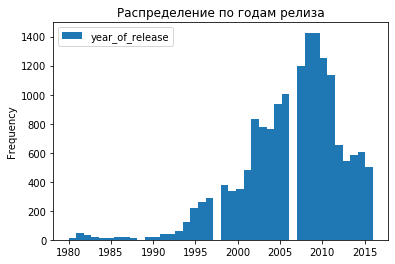

In [21]:
ax = games['year_of_release'].plot(kind='hist', bins=40).legend()
plt.title('Distribution by year of release')

From the 80s to the early 90s there was a plateau with a small volume of sales, then the growth associated with the development of technology and the increase in the number of platforms and consoles began. Since 2010, a decline caused by market saturation and the transition to mobile platforms.

Let's determine the most popular (by the number of sales) platforms

In [22]:
most_popular_platform = games.groupby('platform').agg({'total_sales':'sum'}).reset_index()
most_popular_platform = most_popular_platform.sort_values(['total_sales'], ascending=[False])

In [23]:
most_popular_platform = most_popular_platform.head()

In [24]:
most_popular_platform

,platform,total_sales
16,PS2,1233.56
28,X360,961.24
17,PS3,931.34
26,Wii,891.18
4,DS,802.78


In [25]:
games_t = games.copy()

In [26]:
games_top = games_t.groupby(['platform', 'year_of_release']).agg({'total_sales':'sum'}).reset_index()
games_top = games_top.query('platform == "PS2" or platform == "X360" or platform == "PS3" or platform == "Wii" or platform == "DS"')
games_top = games_top.query('year_of_release > 2013')
games_top['name'] = games_t['name']
games_top['genre'] = games_t['genre']
games_top['na_sales'] = games_t['na_sales']
games_top['eu_sales'] = games_t['eu_sales']
games_top['jp_sales'] = games_t['jp_sales']
games_top['other_sales'] = games_t['other_sales']
games_top['critic_score'] = games_t['critic_score']
games_top['user_score'] = games_t['user_score']
games_top['rating'] = games_t['rating']

In [27]:
games_top.head()

,platform,year_of_release,total_sales,name,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
150,PS3,2014,47.76,LittleBigPlanet,Platform,2.80,1.98,0.17,0.87,95.0,6.8,E
151,PS3,2015,16.82,Resident Evil 2,Action,1.88,1.47,2.02,0.45,89.0,9.2,M
152,PS3,2016,3.60,Dragon Quest IX: Sentinels of the Starry Skies,Role-Playing,0.63,0.67,4.35,0.15,87.0,8.8,E10+
205,Wii,2014,3.75,Tony Hawk's Pro Skater,Sports,3.42,1.38,0.02,0.20,92.0,9.2,T
206,Wii,2015,1.14,Warzone 2100,Strategy,2.79,1.89,0.00,0.33,NaN,NaN,NaN


In [28]:
games_top.head()

,platform,year_of_release,total_sales,name,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
150,PS3,2014,47.76,LittleBigPlanet,Platform,2.80,1.98,0.17,0.87,95.0,6.8,E
151,PS3,2015,16.82,Resident Evil 2,Action,1.88,1.47,2.02,0.45,89.0,9.2,M
152,PS3,2016,3.60,Dragon Quest IX: Sentinels of the Starry Skies,Role-Playing,0.63,0.67,4.35,0.15,87.0,8.8,E10+
205,Wii,2014,3.75,Tony Hawk's Pro Skater,Sports,3.42,1.38,0.02,0.20,92.0,9.2,T
206,Wii,2015,1.14,Warzone 2100,Strategy,2.79,1.89,0.00,0.33,NaN,NaN,NaN


Let's look at the distribution of sales for top platforms by years

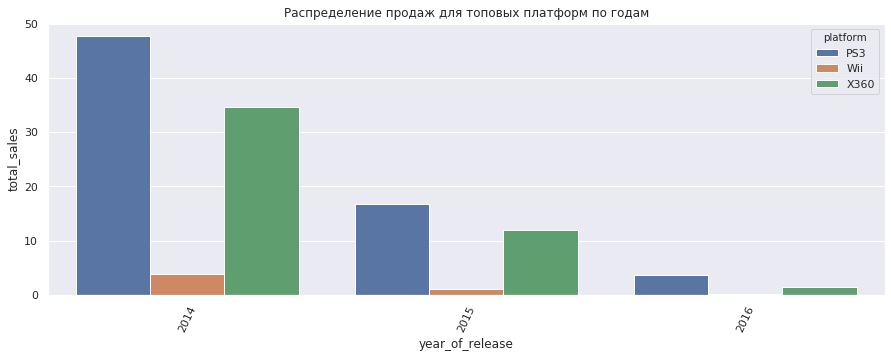

In [29]:
sns.set(rc={'figure.figsize':(15, 5)})
sns.barplot(x='year_of_release', y='total_sales', hue='platform', data=games_top)
plt.xticks(rotation=65)
plt.title('Distribution of sales for top platforms by years')
plt.show()

In [30]:
platform_life = games_t.groupby('platform').agg({'year_of_release':['max', 'min']}).reset_index()
platform_life.columns = ['platform', 'year_of_release_max', 'year_of_release_min']

In [31]:
platform_life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 3 columns):
platform               31 non-null object
year_of_release_max    31 non-null uint16
year_of_release_min    31 non-null uint16
dtypes: object(1), uint16(2)
memory usage: 500.0+ bytes


In [32]:
platform_life['life'] = platform_life['year_of_release_max'] - platform_life['year_of_release_min']

In [33]:
platform_life

,platform,year_of_release_max,year_of_release_min,life
0,2600,1989,1980,9
1,3DO,1995,1994,1
2,3DS,2016,2011,5
3,DC,2008,1998,10
4,DS,2013,1985,28
5,GB,2001,1988,13
6,GBA,2007,2000,7
7,GC,2007,2001,6
8,GEN,1994,1990,4
9,GG,1992,1992,0


In [34]:
platform_life.describe()

,year_of_release_max,year_of_release_min,life
count,31.000000,31.000000,31.000000
mean,2005.258065,1997.645161,7.612903
std,9.273503,9.094131,6.998464
min,1989.000000,1980.000000,0.000000
25%,1996.000000,1992.500000,3.000000
50%,2007.000000,1996.000000,6.000000
75%,2016.000000,2004.500000,10.000000
max,2016.000000,2013.000000,31.000000


In [35]:
games_t_pl = games_t.query('year_of_release > 2013')

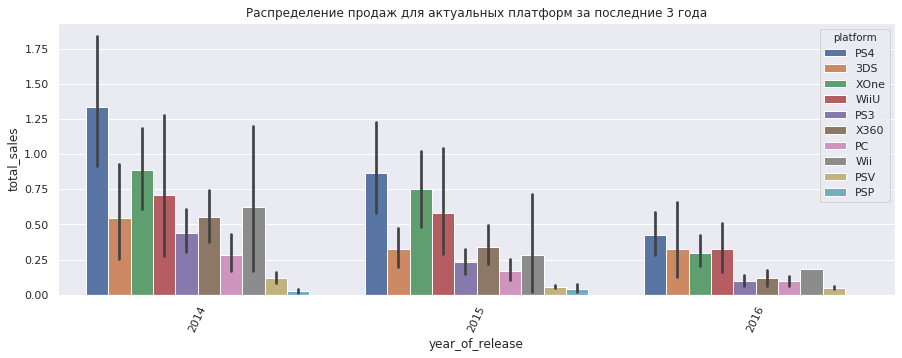

In [36]:
sns.set(rc={'figure.figsize':(15, 5)})
sns.barplot(x='year_of_release', y='total_sales', hue='platform', data=games_t_pl)
plt.xticks(rotation=65)
plt.title('Distribution of sales for current platforms over the past 3 years')
plt.show()

In [37]:
games_t_pl = games_t_pl.groupby(['platform', 'year_of_release']).agg({'total_sales':'sum'}).reset_index()

In [38]:
games_t_pl

,platform,year_of_release,total_sales
0,3DS,2014,43.76
1,3DS,2015,27.78
2,3DS,2016,15.14
3,PC,2014,13.28
4,PC,2015,8.52
5,PC,2016,5.25
6,PS3,2014,47.76
7,PS3,2015,16.82
8,PS3,2016,3.60
9,PS4,2014,100.00


<div class="alert alert-info">
    How can any of the platforms have such growth over the past year. You can relate this to the general economic situation, and pay attention to platforms that show more or less stable sales, still have a high level of sales or had growth in the past such platforms include PS4, XOne, 3DS, PC and PSV.

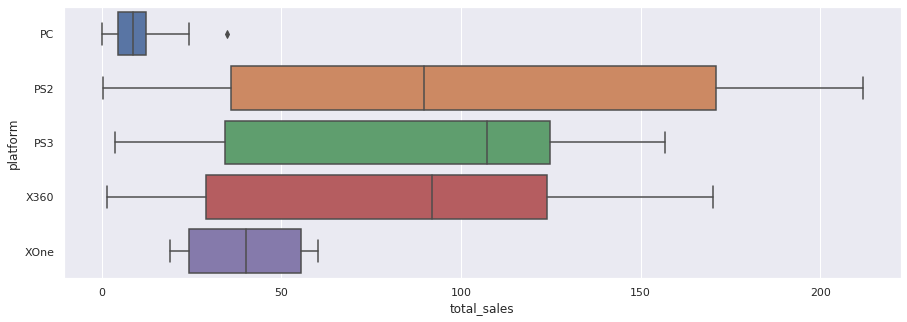

In [39]:
games_plat = games_t.groupby(['platform', 'year_of_release']).agg({'total_sales':'sum'}).reset_index()
games_plat = games_plat.query('platform == "PS2" or platform == "X360" or platform == "PS3" or platform == "PC" or platform == "XOne"')
sns.boxplot(x=games_plat['total_sales'], y=games_plat['platform'])

<div class="alert alert-info">
    For example, let's take the PS3 platform, because. She is the top seller for 2016.

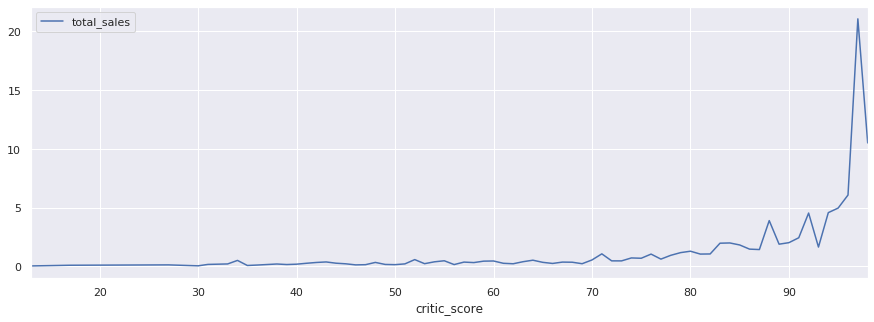

In [40]:
platform_critic_score = games_t.query('platform == "PS3"').pivot_table(
    index='critic_score', values='total_sales')
platform_critic_score.plot()

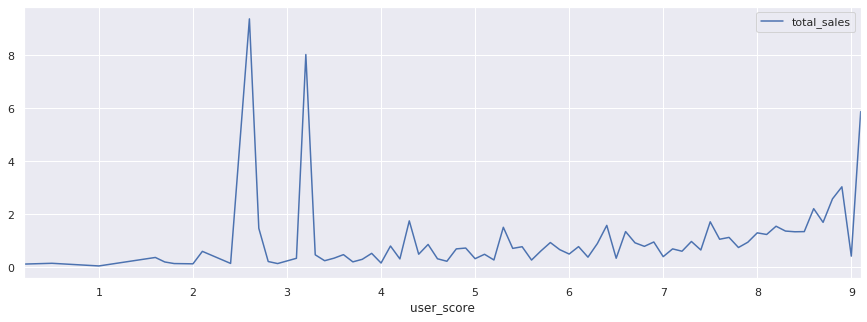

In [41]:
platform_user_score = games_t.query('platform == "PS3"').pivot_table(
    index='user_score', values='total_sales')
platform_user_score.plot()

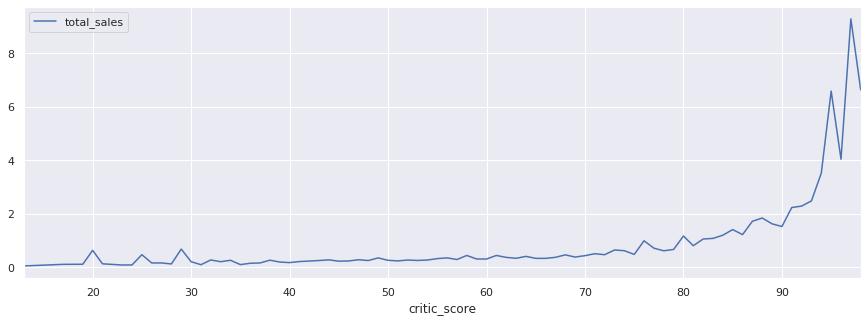

In [42]:
games_t.pivot_table(index='critic_score', values='total_sales').plot()

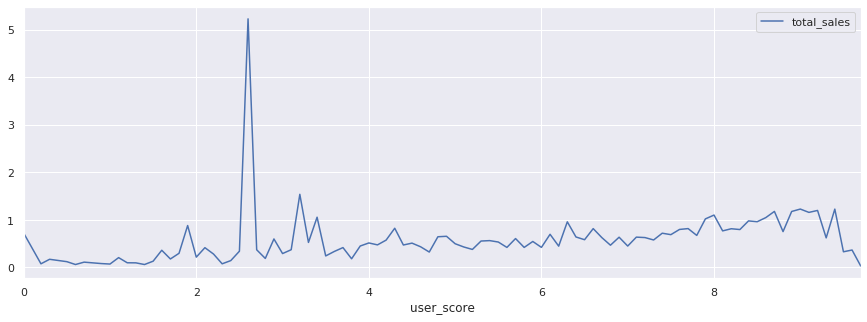

In [43]:
games_t.pivot_table(index='user_score', values='total_sales').plot()

In [44]:
platform_score = games_t.query('platform == "PS3"')
critic_corr = platform_score['critic_score'].corr(platform_score['total_sales'])
user_corr = platform_score['user_score'].corr(platform_score['total_sales'])

In [45]:
critic_corr

0.4327589578997135

In [46]:
user_corr

0.12841562938563006

<div class="alert alert-info">
    It can be said that the opinion of critics still somehow affects sales, but the opinions of users and their ratings do not affect sales. Moreover, this applies to the platform specifically chosen for analysis, and to all others.

In [47]:
most_popular_genre = games.groupby('genre').agg({'total_sales':'count'}).reset_index()
most_popular_genre.sort_values(by='total_sales', ascending=False)

,genre,total_sales
0,Action,3307
10,Sports,2306
3,Misc,1721
7,Role-Playing,1481
8,Shooter,1296
1,Adventure,1293
6,Racing,1226
4,Platform,878
9,Simulation,857
2,Fighting,837


<div class="alert alert-info">
Action games are leaders in sales, and with a fairly high margin (about 70%).
Top three (almost 45% of all sales): Action, Sports, Misc.

# Drawing up a portrait of the user of each region
<a id='portret'></a>

The most popular platforms

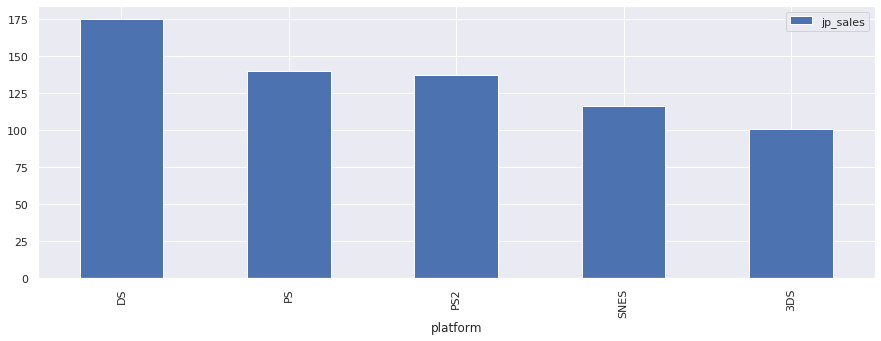

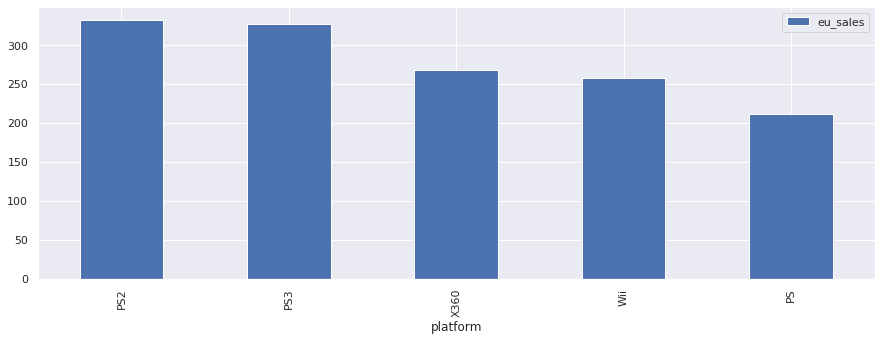

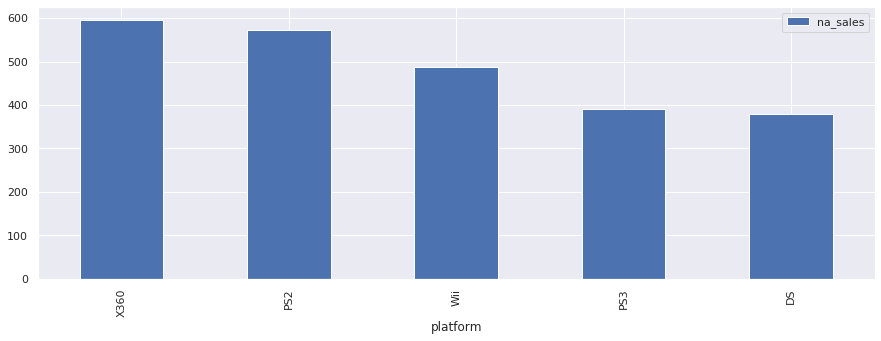

In [48]:
games.groupby(by='platform').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar')
games.groupby(by='platform').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar')
games.groupby(by='platform').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar')

Most Popular Genres

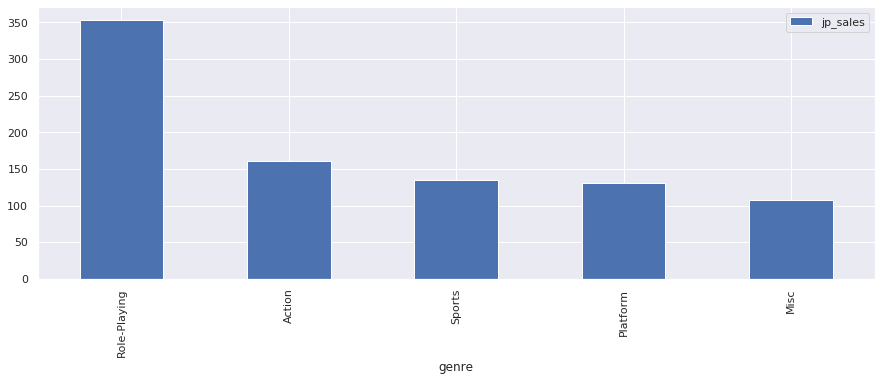

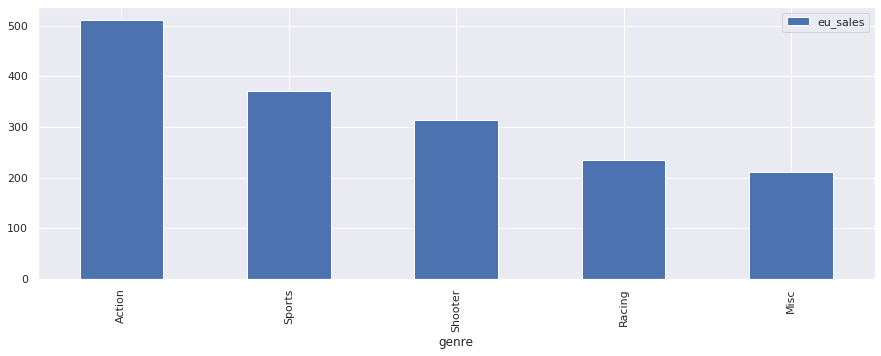

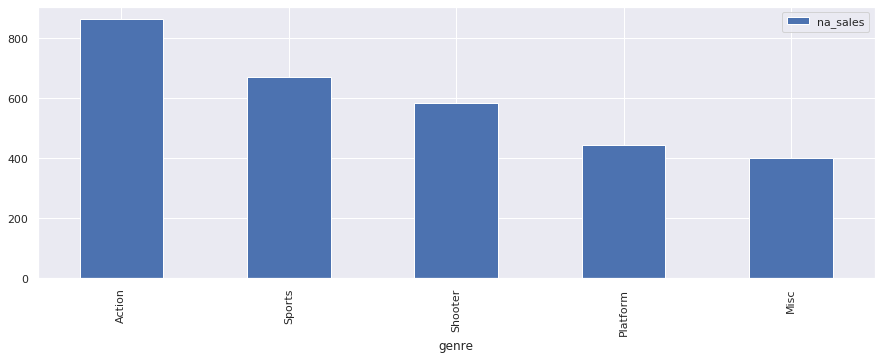

In [49]:
games.groupby(by='genre').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar')
games.groupby(by='genre').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar')
games.groupby(by='genre').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar')

<div class="alert alert-info">
    The Japanese are big fans of all sorts of "anime" and various experiments, they always spread innovations very quickly. Therefore, I think role-playing games are popular with them.

The impact of the ESRB rating on sales in a particular region

In [50]:
games['rating'] = games['rating'].fillna('NC')

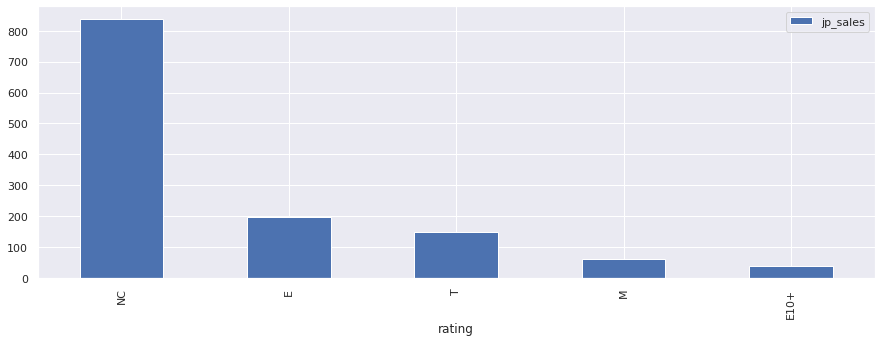

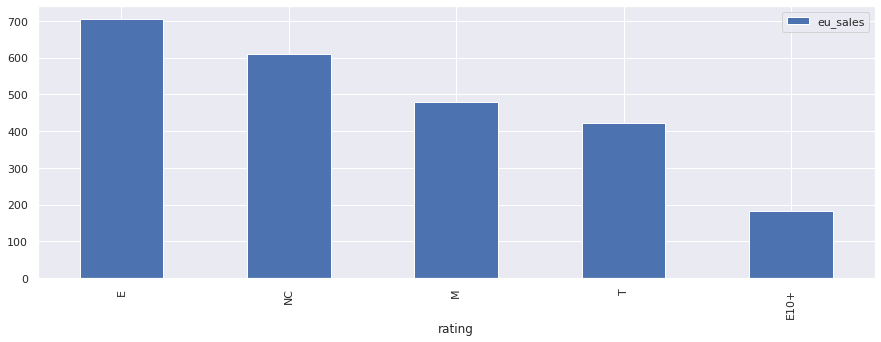

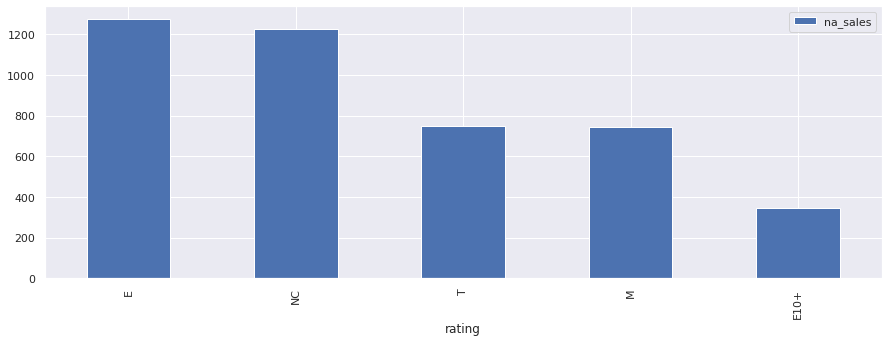

In [51]:
games.groupby(by='rating').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar')
games.groupby(by='rating').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar')
games.groupby(by='rating').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar')

<div class="alert alert-info">
    The missing rating has been replaced with an NC (no category) value because there is no way to fill in the gaps with valid data. An empty rating is present among games of various genres, platforms and release times, so they cannot be classified as pending releases.
     In principle, global trends are similar - the most common are action games with the "For everyone" category. Out of the picture - Japan. It is possible that the rating is not paid much attention there.

# Hypothesis testing
<a id='gipoteza'></a>

We will use the Student's t-test, since the compared samples are independent of each other.

Hypotheses:
- H0: the average user rating of the Xbox One and PC platforms is the same
- H1: average user ratings for Xbox One and PC platforms vary

In [52]:
alpha = 0.05

In [53]:
XOne = games[(games['platform'] == 'XOne') & (games['user_score'] > 0)]['user_score']
PC = games[(games['platform'] == 'PC') & (games['user_score'] > 0)]['user_score']

In [54]:
results = st.ttest_ind(XOne, PC)

In [55]:
print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Rejecting the null hypothesis")
else:
    print("Failed to reject the null hypothesis")

p-значение: 1.3037979620149106e-05
Отвергаем нулевую гипотезу


Hypotheses:
- H0: the average user rating of the Action and Sports genres is the same
- H1: the average user rating of the Action and Sports genres is different

In [56]:
action = games[(games['genre'] == 'Action') & (games['user_score'] > 0)]['user_score']
sports = games[(games['genre'] == 'Sports') & (games['user_score'] > 0)]['user_score']

In [57]:
results = st.ttest_ind(action, sports)

In [58]:

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Rejecting the null hypothesis")
else:
    print("Failed to reject the null hypothesis")

p-значение: 0.06480928064420527
Не получилось отвергнуть нулевую гипотезу


# General conclusion
<a id='end'></a>

Over the past years (since 2008) there has been a significant drop in sales in all regions. This can be influenced by an increase in the share of mobile devices used everywhere and for everything. The general economic situation in which fewer and fewer companies are investing in this also affects.

<div class="alert alert-info">
    During the implementation of the project, several issues were raised regarding the sale of games on various platforms. The main factors influencing sales were not only the prevalence of certain platforms, but also the genre of games.
    Over the past years (since 2008) there has been a significant drop in sales in all regions. This can be influenced by an increase in the share of mobile devices used everywhere and for everything.
    At the time of research, the leading platform is PS (models 2 and 3).
    The longest-lived platform is the PC - more than 30 years on the market (all other modern platforms have an average duration of popularity no more than 10 years).
    The most common games are action games with the "For everyone" category.
    The Japanese market is knocked out of the global trends. Perhaps this is due to their mentality and the speed of technology development.
    